In [1]:
import pandas as pd
from sklearn import tree
df = pd.read_csv('game data.csv')

# drop the days colmns because necessary columns
df.drop('Days', axis=1, inplace=True)

df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


# preprocessing part

In [3]:
# separate the output and features varibale
x = df.drop("Wear Jacket?", axis=1)
y = df[["Wear Jacket?"]]

# label encoding for converting catagorical features ie; x to number/binary representaions
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# imporing is_numeric_dtype for using for loop in features variable ie; x
from pandas.core.dtypes.common import is_numeric_dtype
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    x[col] = le.fit_transform(x[col])
x.head()


,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


# algorithm part for prediction

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

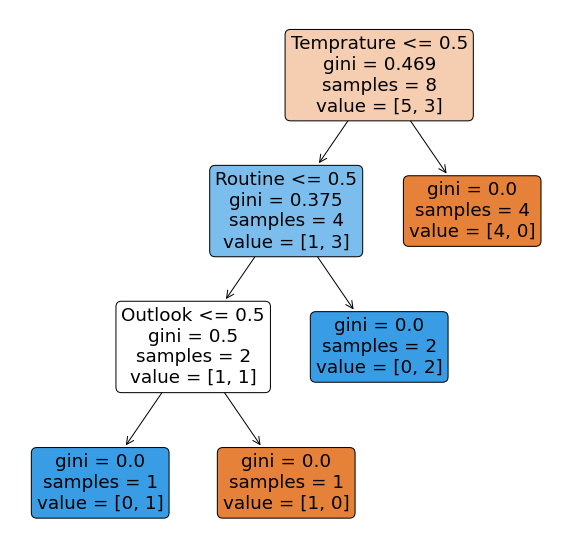

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x,y)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(dt, rounded=True, feature_names=x.columns, filled=True)

In [13]:
dt.predict([[1,0,0]])

C:\Users\u301680\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)